
# Number of Voice Captures per Session


## 0. Importing libraries and FRVRS logs dataframe and creating voices capture dataframe

In [1]:

%pprint
import sys
sys.path.insert(1, '../py')

Pretty printing has been turned OFF


In [2]:

import os
from pandas import DataFrame
import pandas as pd
from notebook_utils import NotebookUtilities
import matplotlib.pyplot as plt
import re
import humanize
from datetime import timedelta

nu = NotebookUtilities(data_folder_path=os.path.abspath('../data'))

In [3]:

# Get all CSVs into one data frame
if nu.pickle_exists('frvrs_logs_df'):
    frvrs_logs_df = nu.load_object('frvrs_logs_df')
    print(frvrs_logs_df.shape)
    # df = frvrs_logs_df.sample(4).dropna(axis='columns', how='all')
    # display(df.T)

(832366, 109)


In [11]:

# Number of Voice Captures per Session
if nu.pickle_exists('voices_captured_df'):
    voices_captured_df = nu.load_object('voices_captured_df')
else:
    
    # Initialize an empty list to store the data for each session
    rows_list = []
    
    # Loop through each unique UUID and scene combination
    for (session_uuid, time_group), df1 in nu.get_session_groupby(extra_column='time_group'):
        
        # Get the logger version
        logger_version = df1.logger_version.unique().item()
        
        # Get the count where action type is voice capture
        mask_series = (df1.action_type == 'VOICE_CAPTURE')
        voices_captured = df1[mask_series].shape[0]
        
        # Create a dictionary to store the data for the current group
        row_dict = {}
        row_dict['logger_version'] = logger_version
        row_dict['session_uuid'] = session_uuid
        row_dict['time_group'] = time_group
        row_dict['voices_captured'] = voices_captured
        
        # Append the dictionary to the list of rows
        rows_list.append(row_dict)
    
    # Create a data frame from the list of dictionaries
    voices_captured_df = DataFrame(rows_list)
    # nu.store_objects(voices_captured_df=voices_captured_df)

In [19]:

voices_captured_df.sort_values('voices_captured')

,logger_version,session_uuid,time_group,voices_captured
548,1.3,7c2549d4-97a4-4389-bd03-029396714f59,1,0
580,1.0,845d87c5-7b8b-4bf3-bfc6-91c74e285243,2,0
599,1.0,87efcdf5-9090-4fa5-afac-25c778924e9a,0,0
113,1.0,16359508-f91b-4f85-baeb-dade7d574a61,0,0
110,1.0,158e6365-673b-4030-8b36-6704be5996a2,1,0
...,...,...,...,...
520,1.0,7407aba4-aef4-4012-be6c-a237d225809d,2,140
81,1.3,0fb12cf8-dcf5-4110-b090-3b3271e9add6,2,140
608,1.0,89c48e7e-780f-4f1b-a846-fc0f4fd9841c,1,144
93,1.3,13839608-6085-4a88-a8f2-74af9fd06a05,2,151


In [15]:

# Get average number of voices captured (this could be including the ones that wave, walk, put hands up)
ave_voices_captured = round(voices_captured_df.voices_captured.mean(), 2)
print(f'The average number of voices captured per scene is {ave_voices_captured}.')

The average number of voices captured per scene is 31.28.


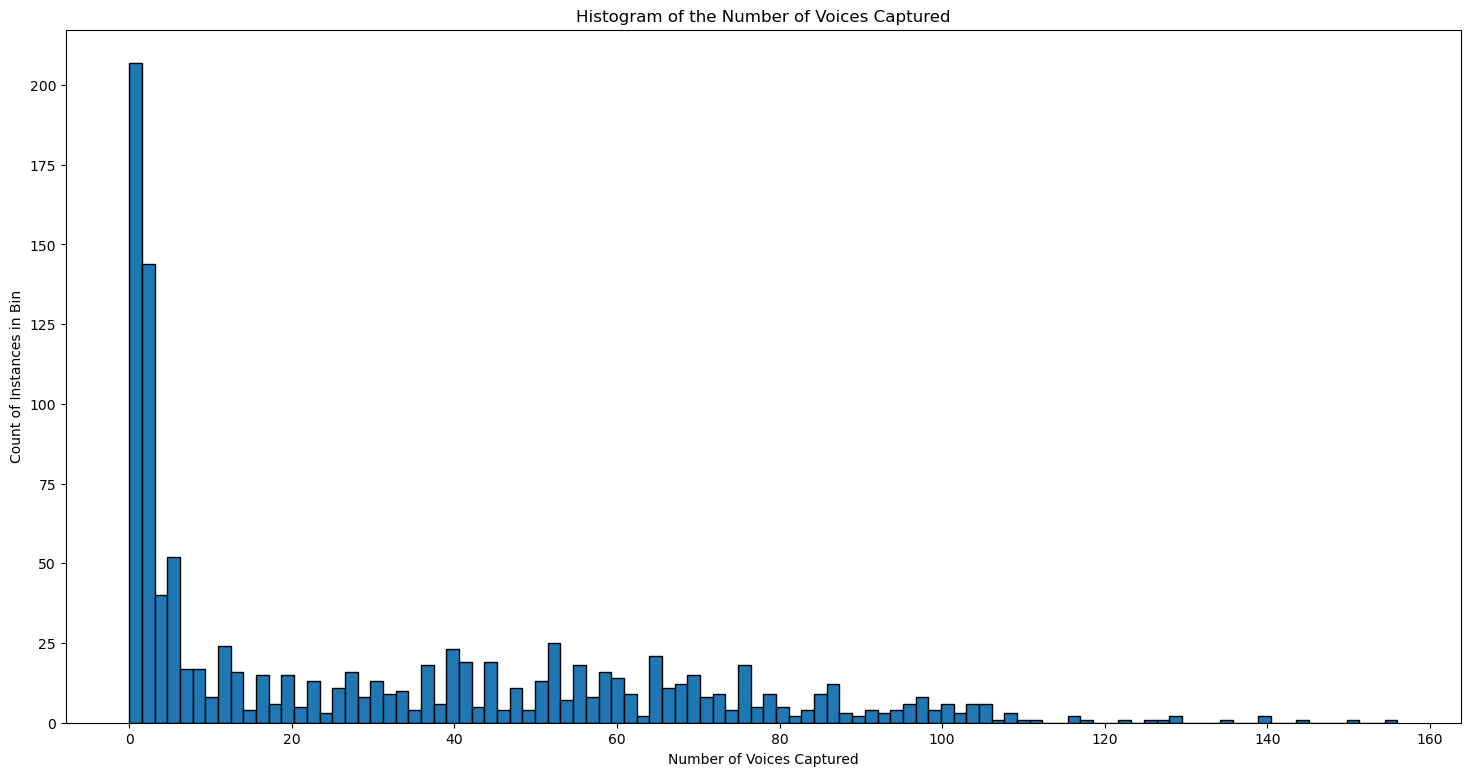

In [29]:

# Histogram of the number of voices captured per UUID
xlabel = 'Number of Voices Captured'
get_xtick_text = lambda text_obj: humanize.intword(
    int(text_obj.get_position()[0])
)
title = f'Histogram of the {xlabel}'
nu.plot_histogram(voices_captured_df, 'voices_captured', xlabel=xlabel, xtick_text_fn=get_xtick_text, title=title)

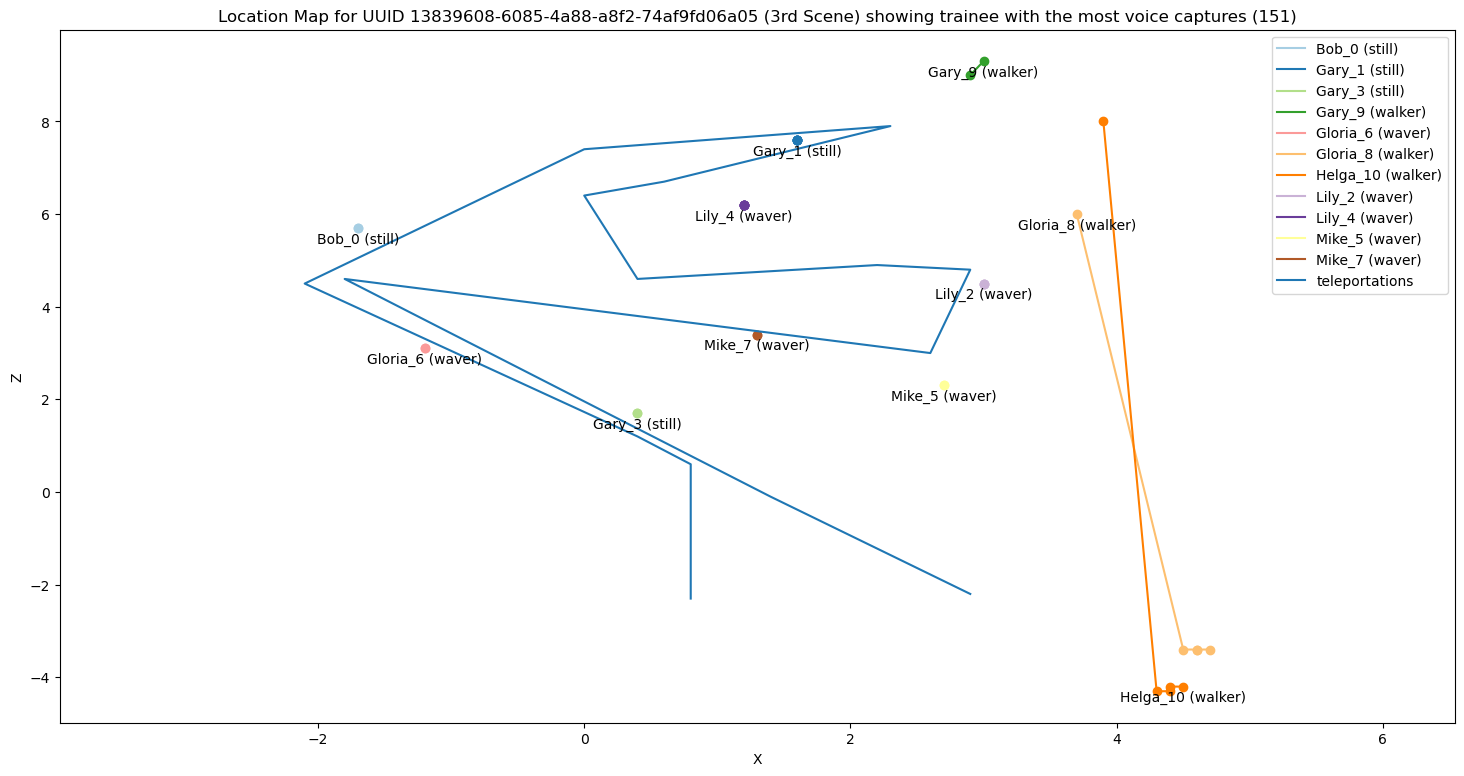

In [21]:

# Get scene with the most voice captures, v1.3
mask_series = (voices_captured_df.logger_version == 1.3)
nu.visualize_extreme_player_movement(
    voices_captured_df, 'voices_captured', mask_series=mask_series, is_ascending=False, humanize_type='intword',
    title_str='most voice captures', frvrs_logs_df=frvrs_logs_df, verbose=False
)

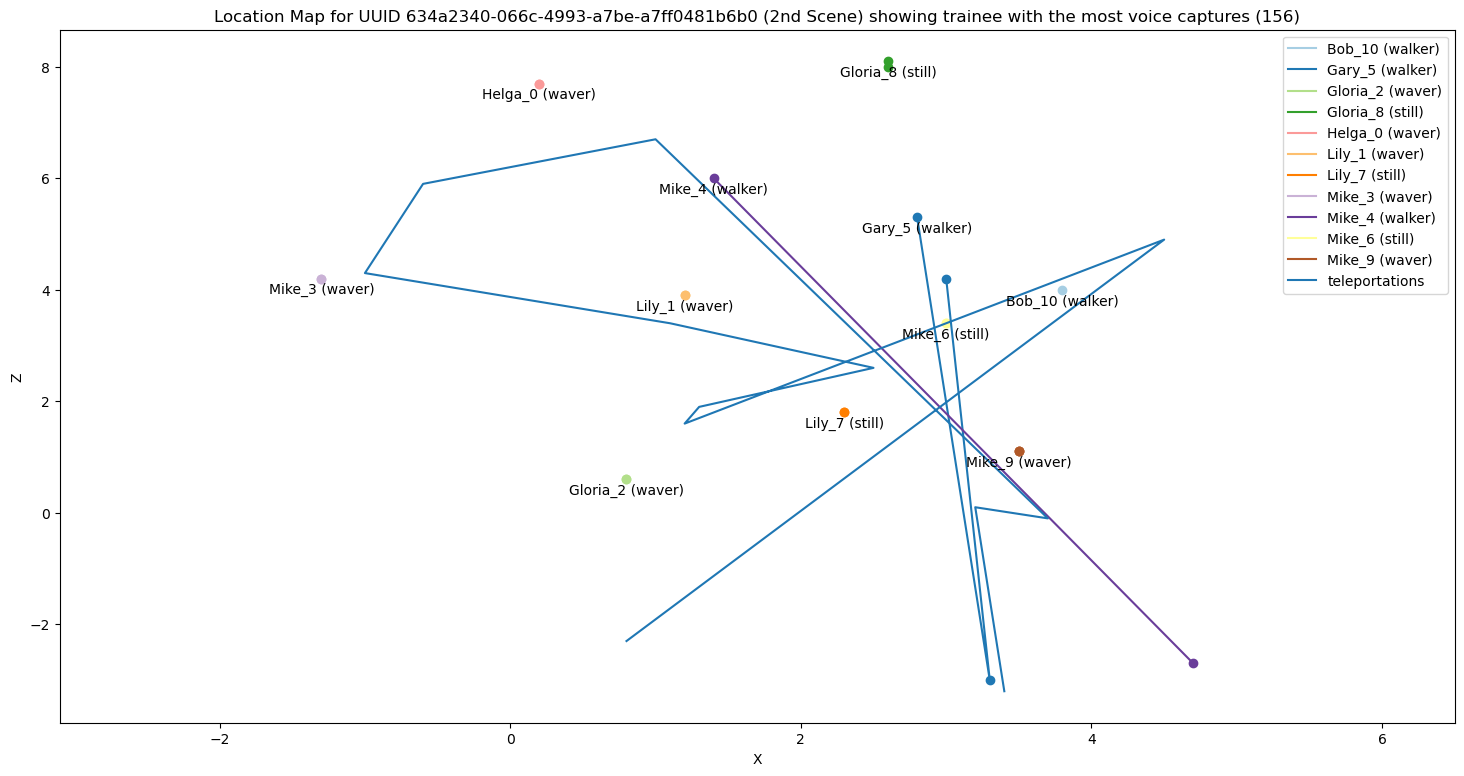

In [22]:

# Get scene with the most voice captures, v1.0
mask_series = (voices_captured_df.logger_version == 1.0)
nu.visualize_extreme_player_movement(
    voices_captured_df, 'voices_captured', mask_series=mask_series, is_ascending=False, humanize_type='intword',
    title_str='most voice captures', frvrs_logs_df=frvrs_logs_df, verbose=False
)

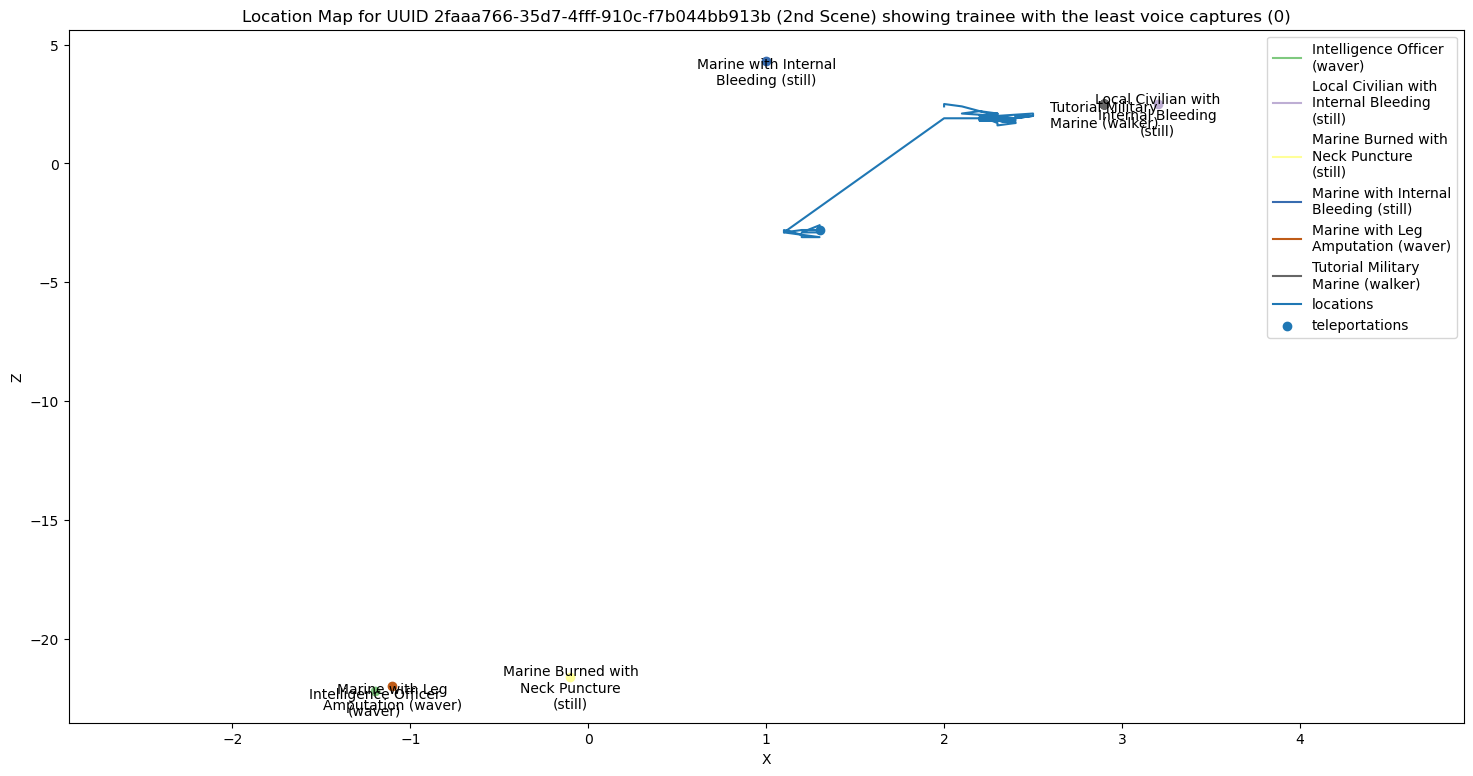

In [24]:

# Get scene with the least voice captures, v1.3
mask_series = (voices_captured_df.logger_version == 1.3)
nu.visualize_extreme_player_movement(
    voices_captured_df, 'voices_captured', mask_series=mask_series, is_ascending=True, humanize_type='intword',
    title_str='least voice captures', frvrs_logs_df=frvrs_logs_df, verbose=False
)

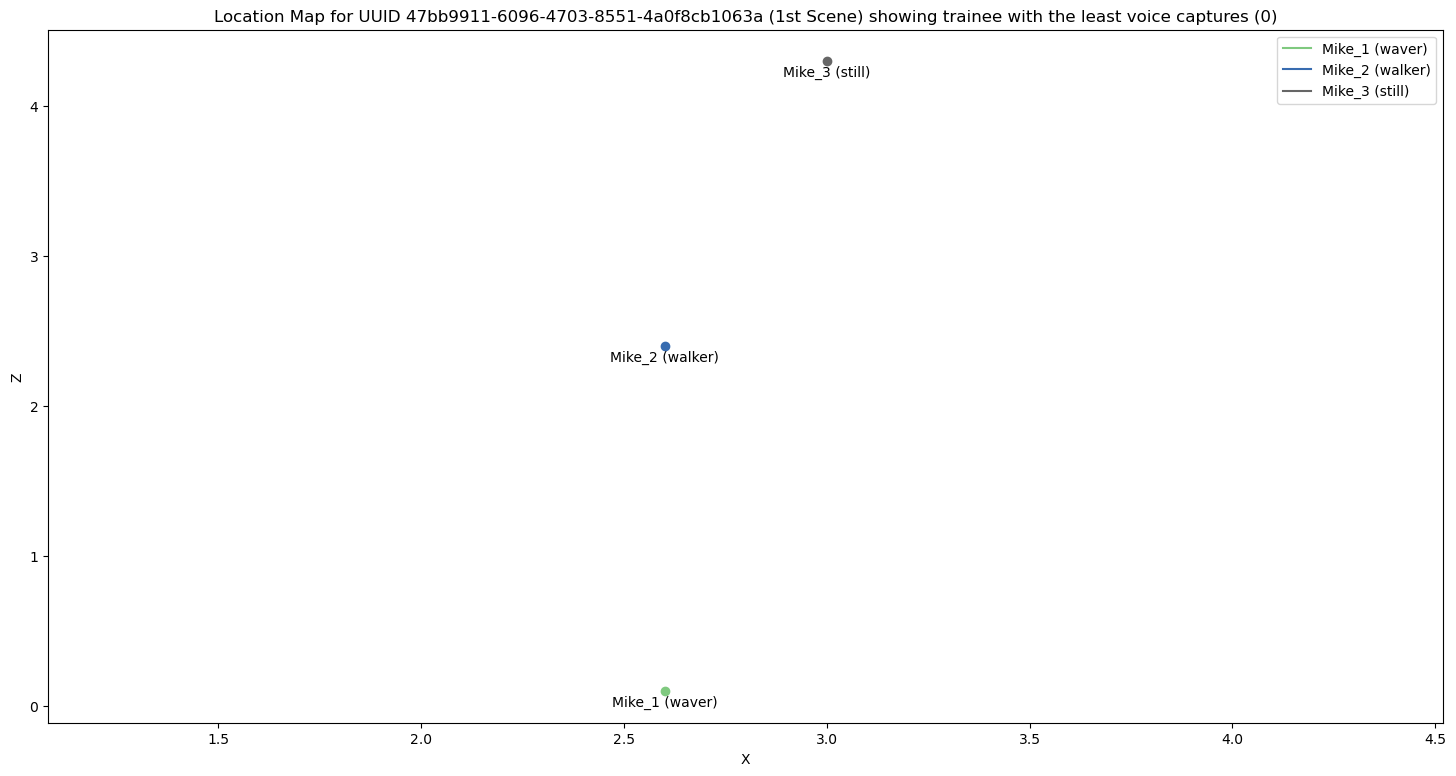

In [25]:

# Get scene with the least voice captures, v1.0
mask_series = (voices_captured_df.logger_version == 1.0)
nu.visualize_extreme_player_movement(
    voices_captured_df, 'voices_captured', mask_series=mask_series, is_ascending=True, humanize_type='intword',
    title_str='least voice captures', frvrs_logs_df=frvrs_logs_df, verbose=False
)


## How many patients are treated between the walk and wave commands?

In [10]:

mask_series = frvrs_logs_df.voice_command_command_description.map(
    lambda x: ('walk' in str(x).lower()) or ('wave' in str(x).lower())
)
frvrs_logs_df[mask_series].voice_command_command_description.unique().tolist()[:10]

['so you know i would walk in see those four patients i would go and say if anybody can hear me i want you to WLK over here OK', "you use your your global sort commands and then then you'll teleport so go ahead and do that WAVE command OK everybody can hear me wave", 'wave', 'alright everybody can hear me walk this way', 'walk', 'two walkers everybody can hear me wave', "if anybody can walk i want you to walk over here and then once your walkers are out of the way then you're gonna go and say if anyone can wave i want you to wave and then you're gonna know who your patients are that can't follow commands OK if in real life if you come up to somebody that had a complete amputation", 'anybody that can walk walk over here', 'anybody that can wave wave', '15 minutes away OK anybody that can hear me and stand up and walk come over here']

In [11]:

# Display a sample of the data frame, dropping columns with all NaN values and transposing it
mask_series = frvrs_logs_df.voice_command_command_description.isin(['walk', 'wave'])
df = frvrs_logs_df[mask_series]
display(df.sample(min(4, df.shape[0])).dropna(axis='columns', how='all').T)

,52292,106951,716079,77201
action_type,VOICE_COMMAND,VOICE_COMMAND,VOICE_COMMAND,VOICE_COMMAND
elapsed_time,364660,294969,18659,568574
event_time,2023-03-15 08:27:57,2023-04-25 10:01:03,2023-03-03 11:03:00,2023-04-19 13:06:10
session_uuid,b05e5139-6dd4-41d2-adb5-aedfebb028a6,89ec8f32-0018-48e7-8cad-c86bd73257f2,d4f8b28e-a0a3-4969-a156-5bf86e4794ba,79426650-c950-40ee-816e-decddddd22e9
file_name,All CSV files renamed by date/03.15.23.0843.csv,All CSV files renamed by date/04.25.23.0956.csv,v.1.0/Clean Marty3.csv,All CSV files renamed by date/04.19.23.1310.csv
logger_version,1.3,1.3,1.0,1.3
time_group,2,2,1,2
voice_command_message,wave if you can,wave if you can,walk to the safe area,wave if you can
voice_command_command_description,wave,wave,walk,wave


In [27]:

def replace_consecutive_elements(actions_list, element='PATIENT_ENGAGED'):
    """
    Replaces consecutive elements in a list with a count of how many there are in a row.
    
    Args:
        list1: A list of elements.
        element: The element to replace consecutive occurrences of.
    
    Returns:
        A list with the consecutive elements replaced with a count of how many there are in a row.
    """
    result = []
    count = 0
    for i in range(len(actions_list)):
        if (actions_list[i] == element): count += 1
        else:
            if (count > 0): result.append(f'{element} x{str(count)}')
            result.append(actions_list[i])
            count = 0
    
    # Handle the last element
    if (count > 0): result.append(f'{element} x{str(count)}')
    
    return(result)
actions_list = [
    'wave if you can', 'wave if you can', 'PATIENT_ENGAGED', 'PATIENT_ENGAGED', 'PATIENT_ENGAGED', 'walk to the safe area',
    'PATIENT_ENGAGED', 'walk to the safe area', 'PATIENT_ENGAGED', 'PATIENT_ENGAGED', 'walk to the safe area',
    'PATIENT_ENGAGED', 'PATIENT_ENGAGED', 'PATIENT_ENGAGED', 'PATIENT_ENGAGED', 'PATIENT_ENGAGED', 'PATIENT_ENGAGED',
    'PATIENT_ENGAGED', 'PATIENT_ENGAGED', 'PATIENT_ENGAGED', 'walk to the safe area', 'PATIENT_ENGAGED', 'PATIENT_ENGAGED',
    'PATIENT_ENGAGED', 'PATIENT_ENGAGED', 'PATIENT_ENGAGED', 'PATIENT_ENGAGED', 'PATIENT_ENGAGED', 'PATIENT_ENGAGED',
    'PATIENT_ENGAGED', 'PATIENT_ENGAGED', 'PATIENT_ENGAGED', 'PATIENT_ENGAGED', 'PATIENT_ENGAGED', 'PATIENT_ENGAGED',
    'PATIENT_ENGAGED', 'PATIENT_ENGAGED'
]
result = replace_consecutive_elements(actions_list, element='PATIENT_ENGAGED')
if result != [
    'wave if you can', 'wave if you can', 'PATIENT_ENGAGED x3', 'walk to the safe area', 'PATIENT_ENGAGED x1',
    'walk to the safe area', 'PATIENT_ENGAGED x2', 'walk to the safe area', 'PATIENT_ENGAGED x9', 'walk to the safe area',
    'PATIENT_ENGAGED x16'
]:
    print('Fix first test')
    print(result)
actions_list = ['PATIENT_ENGAGED', 'wave if you can', 'wave if you can', 'walk to the safe area']
result = replace_consecutive_elements(actions_list, element='PATIENT_ENGAGED')
if result != [
    'PATIENT_ENGAGED x1', 'wave if you can', 'wave if you can', 'walk to the safe area'
]:
    print('Fix second test')
    print(result)

In [28]:

# Visualize the number of voices captured between walk and wave
columns_list = ['voice_command_message', 'action_type']

# Loop through each unique file and scene combination
for (session_uuid, time_group), df1 in nu.get_session_groupby(extra_column='time_group'):
    
    # Get all the engaged, walk, and wave events in this scene
    mask_series = df1.voice_command_message.isin(['walk to the safe area', 'wave if you can'])
    mask_series |= (df1.action_type == 'PATIENT_ENGAGED')
    
    # Print out the results
    df2 = df1[mask_series][columns_list]#.sort_values('elapsed_time')
    if df2.shape[0]:
        print(session_uuid, time_group, end=':\n', flush=True)
        actions_list = []
        for row_index, row_series in df2.iterrows():
            action_type = row_series.action_type
            if (action_type == 'PATIENT_ENGAGED'): actions_list.append('PATIENT_ENGAGED')
            else: actions_list.append(row_series.voice_command_message)
        actions_list = replace_consecutive_elements(actions_list, element='PATIENT_ENGAGED')
        actions_list = replace_consecutive_elements(actions_list, element='walk to the safe area')
        actions_list = replace_consecutive_elements(actions_list, element='wave if you can')
        for action in actions_list:
            print('\t' + str(action))

009b848c-ea64-4f22-bd40-711213a3d327 1:
	PATIENT_ENGAGED x1
	wave if you can x2
	walk to the safe area x1
009b848c-ea64-4f22-bd40-711213a3d327 2:
	wave if you can x2
	PATIENT_ENGAGED x3
	walk to the safe area x1
	PATIENT_ENGAGED x1
	walk to the safe area x1
	PATIENT_ENGAGED x2
	walk to the safe area x1
	PATIENT_ENGAGED x9
	walk to the safe area x1
	PATIENT_ENGAGED x16
00b2e9d8-c3bb-4d89-92c1-abce5c4a0655 1:
	walk to the safe area x3
	wave if you can x1
	PATIENT_ENGAGED x4
00b2e9d8-c3bb-4d89-92c1-abce5c4a0655 2:
	walk to the safe area x2
	wave if you can x1
	PATIENT_ENGAGED x2
	wave if you can x1
	PATIENT_ENGAGED x12
02f6a42e-5211-40ea-8384-824a83ab6760 1:
	walk to the safe area x2
	wave if you can x2
	PATIENT_ENGAGED x10
	walk to the safe area x2
	PATIENT_ENGAGED x9
03b398c5-6fc8-459c-9662-ce1e0babe4b1 1:
	walk to the safe area x2
	wave if you can x2
	PATIENT_ENGAGED x1
	walk to the safe area x1
	wave if you can x1
	PATIENT_ENGAGED x1
	wave if you can x2
	PATIENT_ENGAGED x9
	walk to th


## How many times are walk / wave commands issued?

In [21]:

# Get the number of times walk / wave commands are issued
if nu.pickle_exists('walk_and_wave_count_df'):
    walk_and_wave_count_df = nu.load_object('walk_and_wave_count_df')
else:
    columns_list = ['voice_command_message', 'action_type']
    rows_list = []

    # Initialize the count of times between walk / wave commands
    betweens_list = []
    
    # Loop through each unique file and scene combination
    for (session_uuid, time_group), df1 in nu.get_session_groupby(extra_column='time_group'):
        
        # Establish a data row
        row_dict = {}
        row_dict['logger_version'] = df1.logger_version.unique().item()
        for cn in ['session_uuid', 'time_group']: row_dict[cn] = eval(cn)
        
        # Get all the walk events in this scene
        mask_series = df1.voice_command_message.isin(['walk to the safe area'])
        row_dict['walk_count'] = df1[mask_series].shape[0]
        
        # Get all the wave events in this scene
        mask_series = df1.voice_command_message.isin(['wave if you can'])
        row_dict['wave_count'] = df1[mask_series].shape[0]
        
        # Get all the walk and wave events in this scene
        mask_series = df1.voice_command_message.isin(['walk to the safe area', 'wave if you can'])
        row_dict['walk_and_wave_count'] = df1[mask_series].shape[0]

        # Record the timestamps of each
        betweens_list.extend(df1[mask_series].elapsed_time.tolist())
    
        # Append the data row to the dataset
        rows_list.append(row_dict)
    
    walk_and_wave_count_df = DataFrame(rows_list)
    # nu.store_objects(walk_and_wave_count_df=walk_and_wave_count_df)

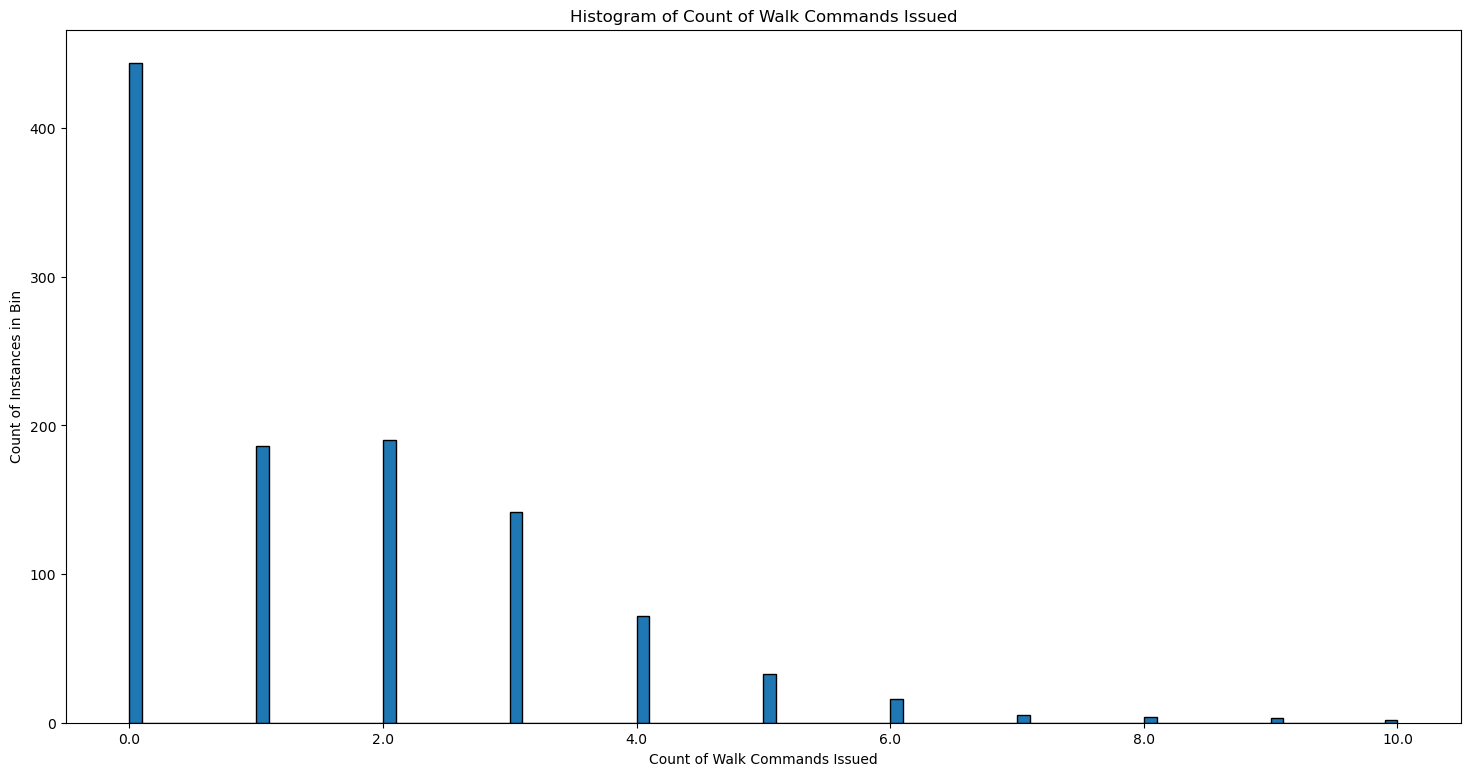

In [23]:

# get_xtick_text = lambda text_obj: humanize.intword(int(text_obj.get_position()[0]))
get_xtick_text = lambda text_obj: text_obj.get_position()[0]
xlabel = 'Count of Walk Commands Issued'
title = f'Histogram of {xlabel}'
nu.plot_histogram(walk_and_wave_count_df, 'walk_count', xlabel=xlabel, xtick_text_fn=get_xtick_text, title=title)

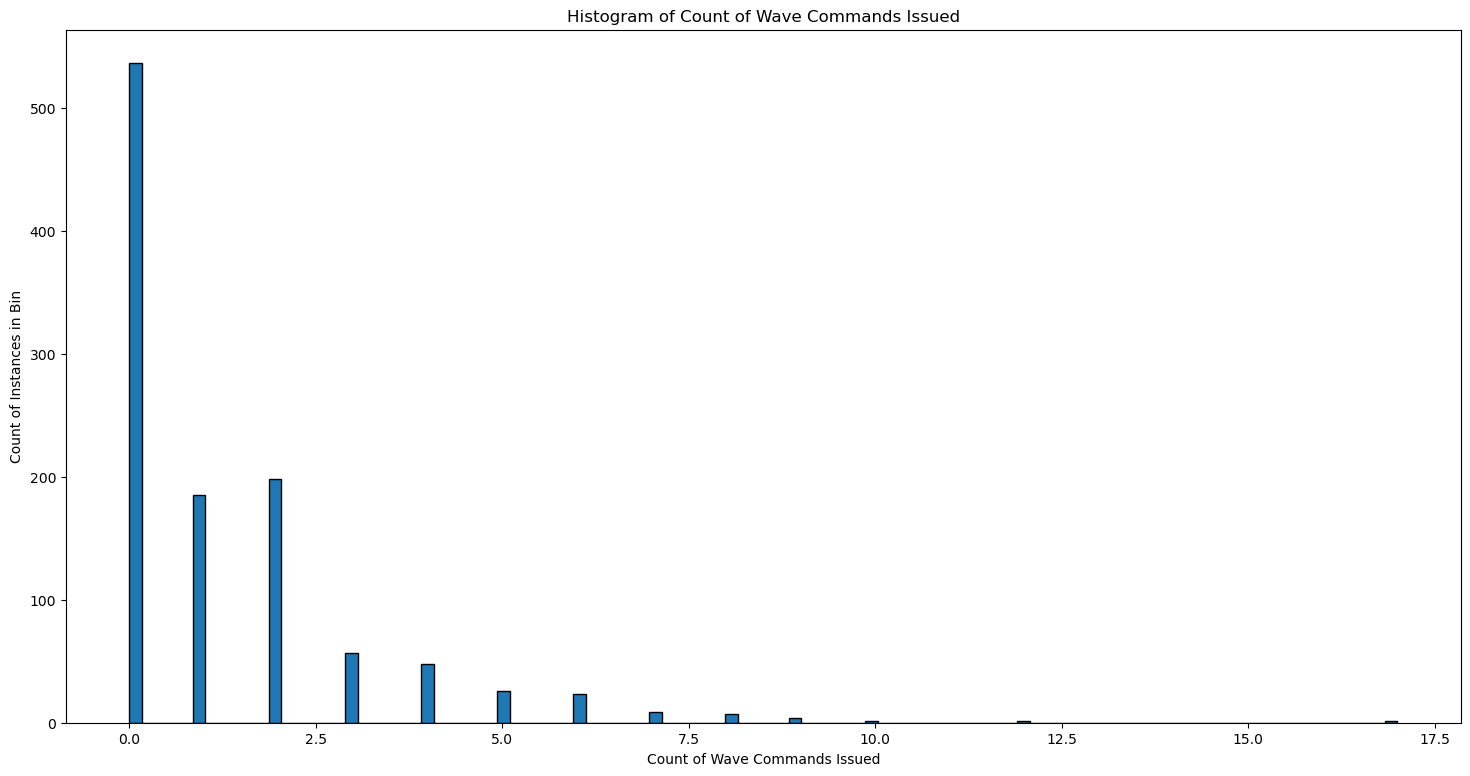

In [19]:

xlabel = 'Count of Wave Commands Issued'
title = f'Histogram of {xlabel}'
nu.plot_histogram(walk_and_wave_count_df, 'wave_count', xlabel=xlabel, xtick_text_fn=get_xtick_text, title=title)

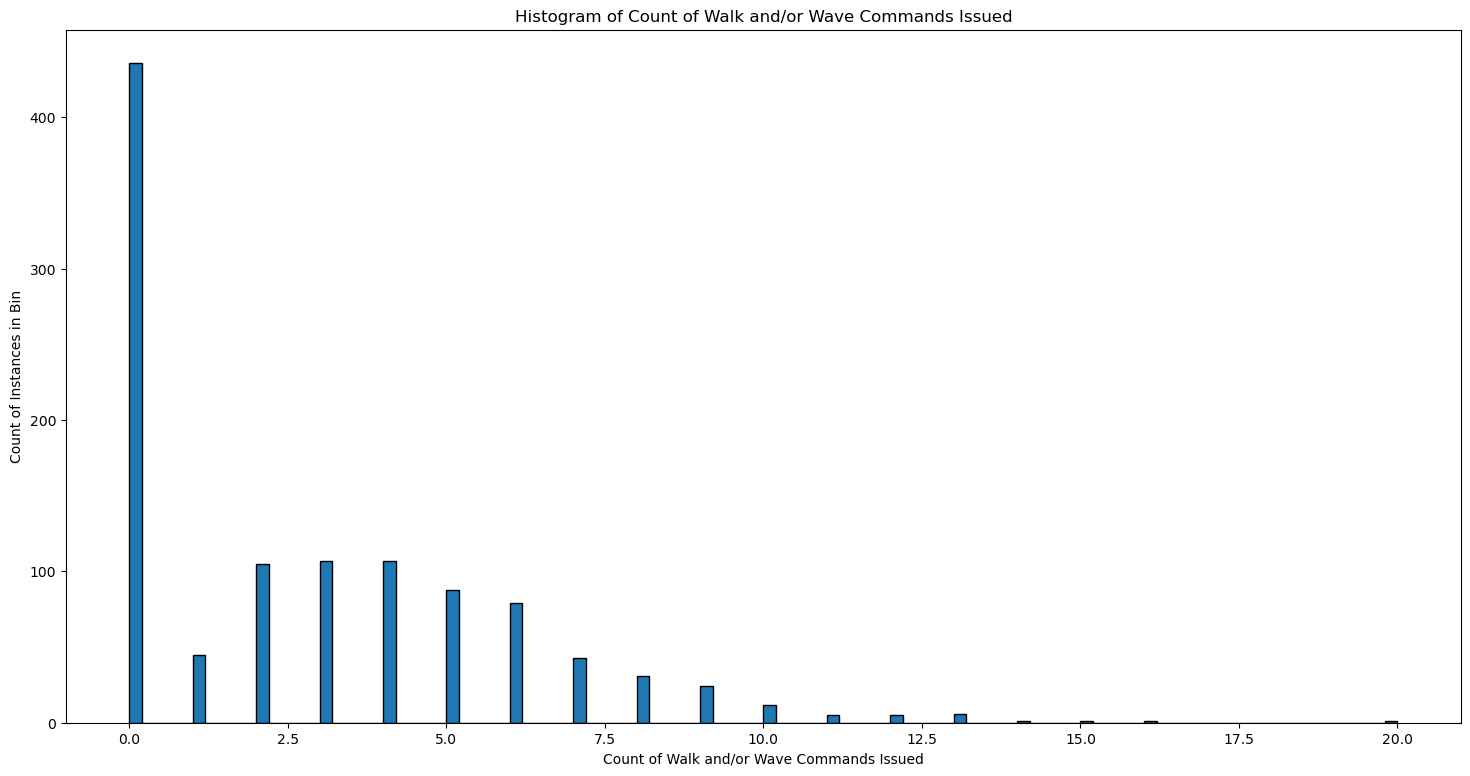

In [20]:

xlabel = 'Count of Walk and/or Wave Commands Issued'
title = f'Histogram of {xlabel}'
nu.plot_histogram(walk_and_wave_count_df, 'walk_and_wave_count', xlabel=xlabel, xtick_text_fn=get_xtick_text, title=title)

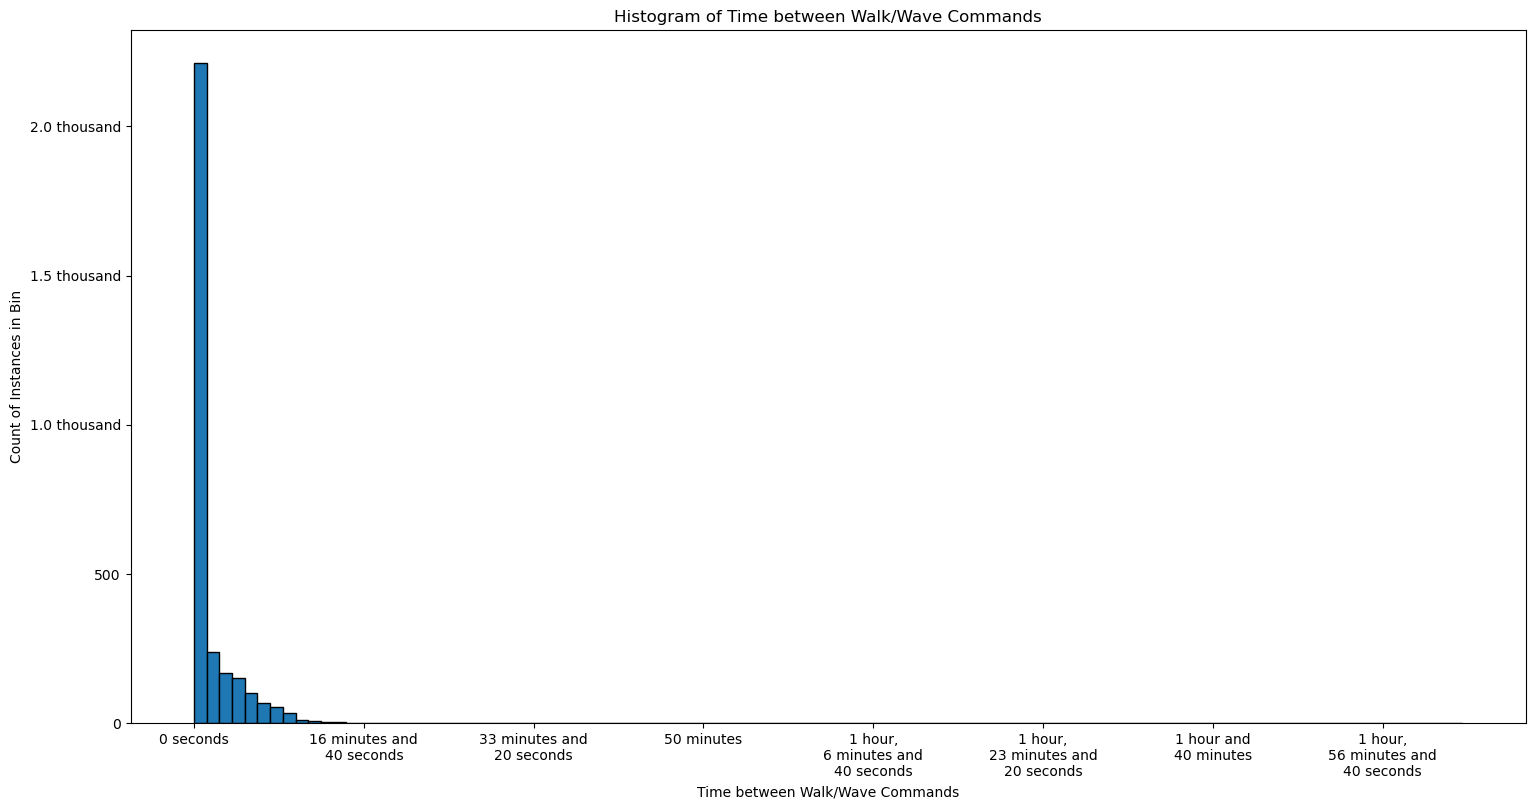

In [36]:

# What is the average time between walk / wave commands?
df = pd.Series(betweens_list).to_frame().rename(columns={0: 'elapsed_time'})
df['time_diff'] = df.elapsed_time.diff().map(lambda x: abs(x))
ave_time = humanize.precisedelta(timedelta(milliseconds=df.time_diff.mean()))
# print(f'The average time between walk/wave commands is {ave_time}.')
xlabel = 'Time between Walk/Wave Commands'
get_xtick_text = lambda text_obj: humanize.precisedelta(
    timedelta(milliseconds=text_obj.get_position()[0])
).replace(', ', ',\n').replace(' and ', ' and\n')
title = f'Histogram of {xlabel}'
nu.plot_histogram(df, 'time_diff', xlabel=xlabel, xtick_text_fn=get_xtick_text, title=title)

In [30]:

from nltk import ngrams

In [31]:

ngrams?

Signature: ngrams(sequence, n, **kwargs)
Docstring:
Return the ngrams generated from a sequence of items, as an iterator.
For example:

    >>> from nltk.util import ngrams
    >>> list(ngrams([1,2,3,4,5], 3))
    [(1, 2, 3), (2, 3, 4), (3, 4, 5)]

Wrap with list for a list version of this function.  Set pad_left
or pad_right to true in order to get additional ngrams:

    >>> list(ngrams([1,2,3,4,5], 2, pad_right=True))
    [(1, 2), (2, 3), (3, 4), (4, 5), (5, None)]
    >>> list(ngrams([1,2,3,4,5], 2, pad_right=True, right_pad_symbol='</s>'))
    [(1, 2), (2, 3), (3, 4), (4, 5), (5, '</s>')]
    >>> list(ngrams([1,2,3,4,5], 2, pad_left=True, left_pad_symbol='<s>'))
    [('<s>', 1), (1, 2), (2, 3), (3, 4), (4, 5)]
    >>> list(ngrams([1,2,3,4,5], 2, pad_left=True, pad_right=True, left_pad_symbol='<s>', right_pad_symbol='</s>'))
    [('<s>', 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, '</s>')]


:param sequence: the source data to be converted into ngrams
:type sequence: sequence or iter
: